## 19. **Object detection**

- Object Detection은 이미지나 영상에서 여러 개의 객체를 인식하고, 각 객체의 위치를 경계 상자(bounding box)로 표시하며, **해당 객체가 무엇인지 분류**하는 컴퓨터 비전 기술
- Object Detection의 출력
    - 각 객체에 대한 **클래스(label)**
    - 각 객체의 **위치 정보(bounding box: x, y, width, height)**
    - 각 탐지 결과에 대한 **신뢰도(score)**

## 20. **Faster R-CNN**

- 객체 탐지(Object Detection)에서 성능과 속도를 모두 향상시킨 모델로, Fast R-CNN에서 후보영역 제안 부분까지 딥러닝으로 통합한 구조
- Slow R-CNN은 후보영역을 비학습 기반 알고리즘(Selective Search 등)으로 생성하고, 각 박스마다 CNN을 수행하여 느림
- Faster R-CNN은 전체 이미지에서 CNN으로 feature map을 추출한 뒤, Region Proposal Network(RPN)을 통해 anchor box 기반의 후보영역을 생성 ⇒ CNN은 한 번만 수행하므로 빠름
- 전체 구조:
    - 입력 이미지 → CNN (feature map 생성)
    - → RPN (object일 확률 높은 영역 제안, sliding window + anchor box 사용)
    - → RoI Pooling (제안된 영역 크기를 고정)
    - → Fully Connected Layer
    - → 분류(Classification) + 위치 보정(Bounding Box Regression)
- 핵심 구성 요소:
    - Feature Map: 전체 이미지에서 CNN으로 특징 추출 (한 번만 실행)
    - RPN: anchor box들을 기준으로 각 위치에서 물체일 확률과 박스 좌표를 예측
    - RoI Pooling: 다양한 크기의 영역을 고정 크기로 변환하여 FC층에 전달
    - 최종적으로 classification과 regression을 통해 object를 탐지

## 21. **IoU, NMS**

- **IoU (Intersection over Union)**: 두 bounding box가 얼마나 겹치는지를 나타내는 지표
    - 계산식: `IoU = (겹치는 영역의 넓이) / (두 박스를 합친 전체 영역의 넓이)`
    - 값이 1에 가까울수록 두 박스는 거의 겹침, 0이면 전혀 안 겹침
- **NMS (Non-Maximum Suppression)**: 객체 탐지 모델이 하나의 객체에 대해 여러 개의 bounding box를 예측하는 문제를 해결
    - 각 box에는 예측 score가 있음
    - 같은 class에 대해 score가 높은 box부터 선택하며, 그 box와 **IoU가 일정 threshold 이상인 box는 제거**
    - 이 과정을 반복해서 중복 박스를 제거하고 하나의 box만 남김
    - 결국 하나의 객체에 대해 예측된 여러 box 중 가장 확신 높은 것만 선택

## 22. **mAP**

- **객체 탐지 성능 평가 지표**로 사용
    - classification에서는 accuracy를 많이 쓰지만, **object detection**에서는 **precision과 recall의 조화**가 중요함
- **mAP (mean Average Precision)**:
    - 예측 결과를 confidence score 순으로 정렬
    - 각 threshold에서 Precision, Recall을 계산하고 곡선을 그림
    - 곡선 아래 면적(AP)을 구한 뒤, 전체 클래스에 대해 평균 ⇒ mAP
- **의미**:
    - 값이 1에 가까울수록 좋은 성능
    - **높은 precision과 recall을 동시에 만족하는 모델일수록 mAP가 높음**

## 23. **Mask r cnn**

- Faster R-CNN을 기반으로 만들어짐
- Faster R-CNN이 객체의 위치(바운딩 박스)와 클래스만 예측하는 데 반해, Mask R-CNN은 **각 객체별 픽셀 단위의 마스크(윤곽선)를 추가로 예측**함 → 즉, 물체의 정확한 모양까지 찾아냄
- 두 가지 작업을 동시에 수행:
    1. **객체 탐지** (물체 위치 + 클래스 분류)
    2. **인스턴스 분할** (물체별 마스크 생성)
- **RoIAlign**: Faster R-CNN의 RoIPooling 문제를 보완해서 더 정확한 위치 정보를 얻음

In [5]:
from torchvision.io.image import read_image
from torchvision.models.detection import maskrcnn_resnet50_fpn_v2, MaskRCNN_ResNet50_FPN_V2_Weights
from torchvision.transforms.functional import to_pil_image

img_path = "data/dog and cat.jpg"
img = read_image(img_path)

# 모델 로드
weights = MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = maskrcnn_resnet50_fpn_v2(weights=weights)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [6]:
# 이미지 전처리 + batch 생성
preprocess = weights.transforms()
batch = preprocess(img).unsqueeze(0) # [C, H, W]  →  [1, C, H, W]

# 예측 후 한장이니까 [0]로 접근
prediction = model(batch)[0]

print(prediction.keys())
# boxes: [x1, y1, x2, y2] 형식의 좌표
print(f'Boxes: {prediction["boxes"]}')
# labels: 각 박스에 대한 클래스 인덱스
print(f'Labels: {prediction["labels"]}')
# scores: 각 박스에 대한 신뢰도
print(f'Scores: {prediction["scores"]}')
# masks: 각 박스에 대한 segmentation(경계)
print(f'Masks: {prediction["masks"]}')

dict_keys(['boxes', 'labels', 'scores', 'masks'])
Boxes: tensor([[ 847.7133,  552.0703, 1148.2650,  794.4439],
        [ 170.5824,  429.6424,  371.9465,  793.5991],
        [ 576.0234,  247.5586,  859.0859,  789.3636],
        [ 290.7637,  321.3723,  575.8033,  800.3698],
        [ 296.7421,  327.3615,  576.1887,  806.2036],
        [ 576.1053,  246.8478,  861.7464,  799.2390],
        [ 281.9865,  318.9644,  577.1738,  798.8759],
        [ 298.3078,  317.6114,  573.8784,  789.4502]],
       grad_fn=<StackBackward0>)
Labels: tensor([17, 17, 18, 18, 88, 17, 17, 23])
Scores: tensor([0.9978, 0.9965, 0.9826, 0.9349, 0.3649, 0.3269, 0.1556, 0.1401],
       grad_fn=<IndexBackward0>)
Masks: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0.,

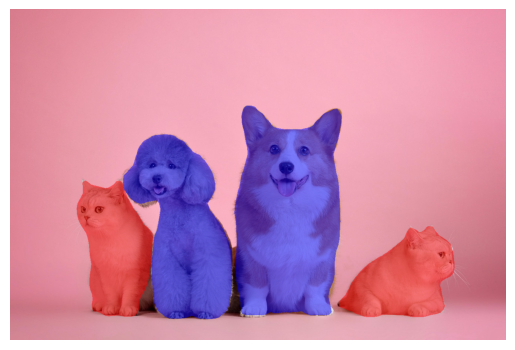

In [7]:
from torchvision.utils import draw_segmentation_masks
import matplotlib.pyplot as plt

colors = ['red', 'blue']

result_img = img.clone()
for idx in range(prediction['scores'].shape[0]):
  score = prediction['scores'][idx].item()
  # 신뢰도가 0.9 미만인 경우 break
  if score < 0.9:
    break

  # 강아지면 파란색, 고양이면 빨간색
  # 17: cat, 18: dog
  color = colors[0] if prediction['labels'][idx].item() == 17 else colors[1]

  # 0과 1의 개수의 비율로 설정 True → 객체, False → 배경
  mask = 0.5 < prediction['masks'][idx][0]

  result_img = draw_segmentation_masks(result_img, mask, alpha=0.5, colors=color)

plt.imshow(to_pil_image(result_img))
plt.axis('off')
plt.show()
